In [34]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
print('Esperamos trabalhar no diretório')
meu_diretorio = "C:/Users/gabri/Documents/Insper/Segundo Semestre/Ciencia dos Dados/Ciencia-dos-Dados/Projeto1"
os.chdir(meu_diretorio)

print(os.getcwd())


Esperamos trabalhar no diretório
C:\Users\gabri\Documents\Insper\Segundo Semestre\Ciencia dos Dados\Ciencia-dos-Dados\Projeto1


# Projeto 1 - Ciência dos Dados#
**Gabriel Pascua de Freitas Moreira**

**Turma 2B**

**Análise da União Europeia**

Os anos a serem analisados serão no intervalo entre 2003 e 2008


A escolha desses anos foi feita por conta do ano de adesão de quatro dos países analisados, sendo eles:
- Polônia
- Tchéquia
- Estônia
- Hungria

E o seu ano de adesão sendo 2004

Como grupo de controle foram utilizados 3 países já membros, sendo eles:
- Alemanha
- França
- Bélgica

**Perguntas**
1. Países que se juntam à União Europeia tem uma diminuição da taxa de desemprego?
2. Países que se juntam União Europeia tem um aumento do PIB per capita?

**Hipóteses**
1. Países que entram na União Europeia terão uma diminuição na taxa de desemprego, visto que haverá mais oportunidades, devida as relações com outros países europeus ser facilitada e há a possibilidade de livre transição entre países
2. Países que entram na União Europeia tem aumneto no PIB per capita, devido ao livre comércio garantido com a adesão ao bloco

**Base de Dados Utilizada**

https://www.gapminder.org/tools

https://futureofworking.com/11-advantages-and-disadvantages-of-the-european-union/

https://en.wikipedia.org/wiki/Hungary

https://www.bbc.com/news/39655415

**Países e suas respectivas regiões**


In [35]:
regiao = pd.read_excel('regioes.xlsx')


**Pertencimento à União Europeia**

In [36]:
regiao.loc[:,"EU"] = 0
regiao_idx = regiao.set_index('country')
eu=["Belgium","France","Germany","Italy","Luxembourg","Netherlands","Denmark","Ireland","United Kingdom","Greece","Portugal","Spain","Austria","Finland","Sweden","Cyprus","Czech Republic","Estonia","Hungary","Latvia","Lithuania","Malta","Poland","Slovak Republic","Slovenia"]
regiao_idx.loc[eu,"EU"] = 1

# Análise - Índice de Desemprego 

In [37]:
desemprego = pd.read_excel('desemprego.xlsx')


#### Junção das tabelas de Desemprego e Regiões e índices transformados nos nomes dos países

In [38]:
desemp_idx = desemprego.set_index('country')
desemp_reg = desemp_idx.join(regiao_idx, how='inner')

#### Separação dos países europeus em relação ao seu pertencimento na União Europeia

In [39]:
desemp_europe = desemp_reg[desemp_reg.regions == "europe"]
UE_desemp =  desemp_europe[desemp_europe.EU ==1]
EU_2004 = ["Poland","Hungary","Estonia","Czech Republic"]
EU_Membros = ["Germany","France","Belgium"]


#### Separação dos países a serem analisados

In [40]:
desemp_analise = UE_desemp.loc[["Poland","Hungary","Estonia","Czech Republic","Germany","France","Belgium"],[2003,2004,2005,2006,2007,2008]]

desemp_transpose = desemp_analise.transpose()

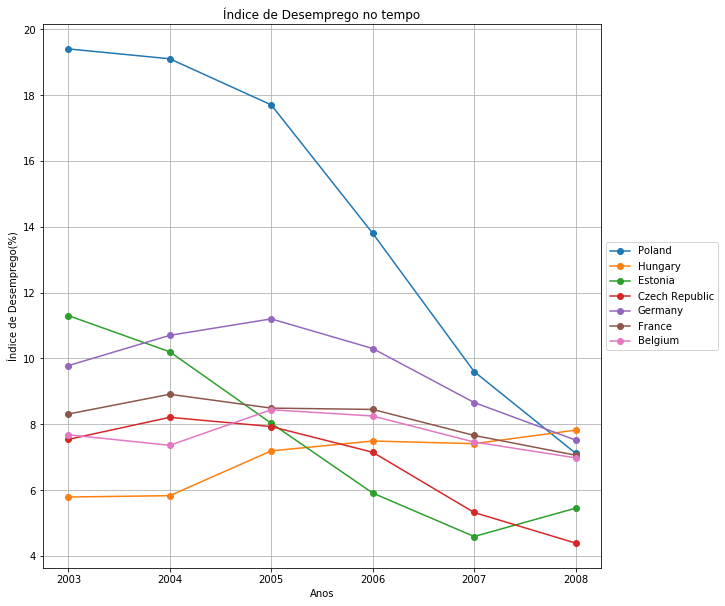

In [41]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
for pais in desemp_transpose.columns:
    plt.plot(desemp_transpose.index,desemp_transpose[pais],"-o")
    plt.title("Índice de Desemprego no tempo")
    plt.xlabel("Anos")
    plt.ylabel("Índice de Desemprego(%)")
    plt.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)


In [42]:
desemp_analise.loc[:,"Taxa de Desemprego"] = "Aumentou"
for pais in desemp_analise.index:
    
    if desemp_analise.loc[pais,2003]>desemp_analise.loc[pais,2008]:

        desemp_analise.loc[pais,"Taxa de Desemprego"] = "Diminuiu"
desemp_analise


,2003,2004,2005,2006,2007,2008,Taxa de Desemprego
country,,,,,,,
Poland,19.40,19.10,17.70,13.80,9.60,7.12,Diminuiu
Hungary,5.79,5.83,7.19,7.49,7.41,7.82,Aumentou
Estonia,11.30,10.20,8.03,5.91,4.59,5.45,Diminuiu
Czech Republic,7.54,8.21,7.93,7.15,5.32,4.39,Diminuiu
Germany,9.78,10.70,11.20,10.30,8.66,7.52,Diminuiu
France,8.31,8.91,8.49,8.45,7.66,7.06,Diminuiu
Belgium,7.68,7.36,8.44,8.25,7.46,6.98,Diminuiu


## Análise dos dados
**Taxa de desemprego**

Analisando o gráfico plotado acima e a coluna criada a partir da comparação entre as taxas de desemprego do primeiro e do último ano analisados, é possível perceber que após a entrada na União Europeia, a tendecência é da taxa de desemprego diminuir, isso pode ser obseravdo tanto para os membros que já estavam presentes na organização quanto para os que acabaram de se juntar a ela.

Porém a Hungria, se comportou como uma exceção, foi o único dos países analisados que teve aumento na taxa de desemprego, e um dos possíveis motivos disso é que a Hungria passou por uma transição do sistema comunista para um sistema democrático e capitalista, por conta disso e da rápida privatização e fim dos subsídios estatais, o país apresentava um quadro de recessão economica e portanto em suas eleições havia sempre a mudança de partido político, assim gerando uma instabilidade na sua economia e aumentando as taxas de desemprego, esse quadro já não está mais presente nos dias de hoje e portanto após 2010 a sua taxa de desmeprego começou a dimunuir com era esperado.

# Análise - PIB Per Capita

In [43]:
GDPcapita = pd.read_excel('gdpcapita.xlsx')

#### Junção das tabelas de PIB e Regiões e índices transformados nos nomes dos países

In [44]:
gdp_idx = GDPcapita.set_index('country')
gdp_reg = gdp_idx.join(regiao_idx, how='inner')

gdp_reg_f = gdp_reg.loc[:,[2003,2004,2005,2006,2007,2008,'regions','EU']]

gdp_europe = gdp_reg_f[gdp_reg_f.regions == "europe"]

**Separação dos países europeus em relação ao seu pertencimento na União Europeia**

In [45]:
UE_gdp =  gdp_europe[gdp_europe.EU ==1]

#### Separação dos países a serem analisados

In [46]:
gdp_analise = UE_gdp.loc[["Poland","Hungary","Estonia","Czech Republic","Germany","France","Belgium"],[2003,2004,2005,2006,2007,2008]]
gdp_transpose = gdp_analise.transpose()

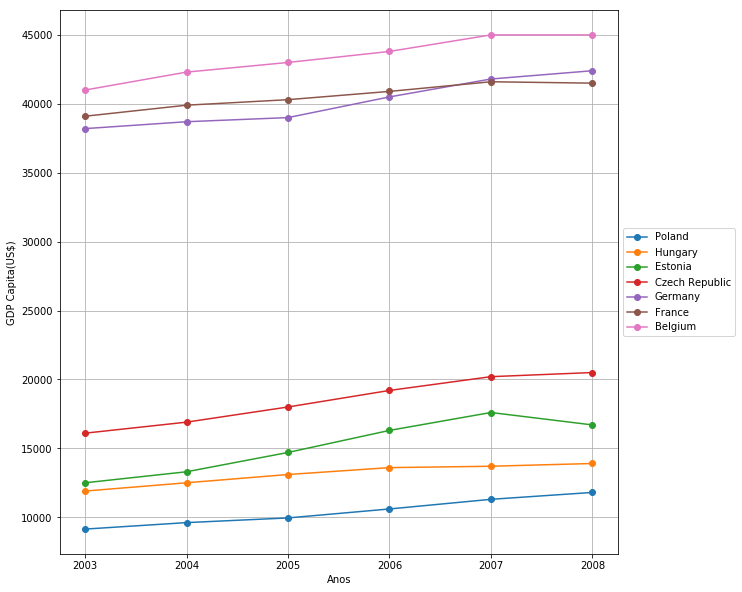

In [47]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
for pais in gdp_transpose.columns:
    plt.plot(gdp_transpose.index,gdp_transpose[pais],"-o")
    plt.xlabel("Anos")
    plt.ylabel("GDP Capita(US$)")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)

In [48]:
gdp_analise.loc[:,"PIB per Capita"] = "Aumentou"
for pais in gdp_analise.index:
    
    if gdp_analise.loc[pais,2003]>gdp_analise.loc[pais,2008]:

        gdp_analise.loc[pais,"PIB per Capita"] = "Diminuiu"
gdp_analise

,2003,2004,2005,2006,2007,2008,PIB per Capita
country,,,,,,,
Poland,9140.0,9610.0,9950.0,10600.0,11300.0,11800.0,Aumentou
Hungary,11900.0,12500.0,13100.0,13600.0,13700.0,13900.0,Aumentou
Estonia,12500.0,13300.0,14700.0,16300.0,17600.0,16700.0,Aumentou
Czech Republic,16100.0,16900.0,18000.0,19200.0,20200.0,20500.0,Aumentou
Germany,38200.0,38700.0,39000.0,40500.0,41800.0,42400.0,Aumentou
France,39100.0,39900.0,40300.0,40900.0,41600.0,41500.0,Aumentou
Belgium,41000.0,42300.0,43000.0,43800.0,45000.0,45000.0,Aumentou


# Análise dos dados
**PIB per Capita**

Analisando o gráfico plotado acima e a coluna criada a partir da comparação entre o PIB per Capita do primeiro e do último ano analisados, é possível perceber que após a entrada na União Europeia, a tendecência é do aumento do PIB per Capita, isso pode se dar pelo livre comércio establecido dentro do grupo, essa melhoria ocorre tanto para os membros recém-chegados quanto os que já estavam participando do bloco

E é possível explicar a queda do PIB per Capita da Estônia do ano de 2007 para 2008, esse fato se deu por conta de um ciberataque no ano de 2007, por conta da mudança de local de uma estátua, fato realizado pelo governo. Essa mudança causou desconforto em uma parcela da população, os quais iniciaram o ciberataque e por conta dele, o sistema de bancos, de retirada de dinheiro e de mensagens ficou prejudicado e portanto o PIB teve uma queda

# Análise - PIB per Capita e Índice de Desemprego
**Foram escolhidos o primeiro e o último ano de análise para serem comparados**

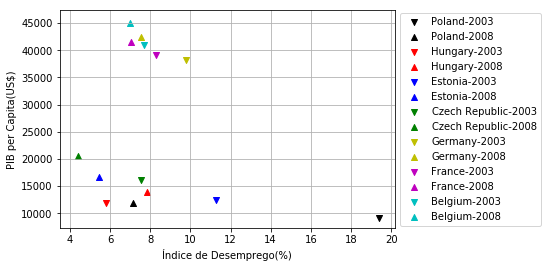

In [50]:
cores = ["k","r","b","g","y","m","c"]
i=0
j=0
markers =['v', '^']

for pais in gdp_analise.index:
    cor = cores[i]
    for x in [2003,2008]:
        if x == 2003:
            simbolo=markers[0]
        else:
            simbolo=markers[1]
        desemp_ = desemp_europe.loc[[pais],[x]] 
        gdp_ = gdp_europe.loc[[pais],[x]]
        join1 = desemp_.join(gdp_,how="inner",lsuffix="_desemp",rsuffix="_gdp")

        join2 = join1.join(regiao_idx,how="inner")

        ax = plt.subplot(111)
        
        plt.scatter(x=join2.loc[pais,"{0}_desemp".format(x)],y=join2.loc[pais,"{0}_gdp".format(x)],marker=simbolo,label="{0}-{1}".format(pais,x),color="{0}".format(cor))
        plt.legend()
        plt.grid(True)
        plt.xlabel("Índice de Desemprego(%)")
        plt.ylabel("PIB per Capita(US$)")
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
    i+=1

# Conclusão
Podemos perceber com a análise de todos os dados e gráficos que a entrada na União Europeia é benéfica, pois além de diminuir o índice de desemprego, também consegue aumentar o PIB per Capita.

Também é possível perceber que os dois indicadores tem uma relaçao inversamente proporcional, onde quando o PIB per Capita aumenta, o índice de desemprego diminui, não valendo apenas par uma exceção, a Hungria, porém esse fato pode ser explicado.

A hungria teve seu índice de desemprego crescente devido à sua transição para o capitalismo, pois a sociedade como um todo foi alterada e o país entrou em uma recessão economica, assim diminuindo a quantidade de empregados, porém seu PIB per Capita teve um aumento devido a grande quantidade de empresas privadas que apareceram no país após o estabelecimento do livre mercado e elas tiveram grande influência no PIB, passando a compor grande parte dele 